In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"D:\ML PROJECTS\Music Genre Classification\Data\features_30_sec.csv")

# Show all columns so we know what they are
print(df.columns.tolist())


['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


In [21]:
features_to_use = [
    'chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean', 'spectral_bandwidth_mean',
    'rolloff_mean', 'zero_crossing_rate_mean'
] + [f'mfcc{i}_mean' for i in range(1, 21)]



In [22]:
X = df[features_to_use]
y = df['label']


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [26]:
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 2))

print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


✅ Accuracy: 0.65
📋 Classification Report:

              precision    recall  f1-score   support

       blues       0.61      0.70      0.65        20
   classical       0.86      0.95      0.90        20
     country       0.59      0.65      0.62        20
       disco       0.50      0.25      0.33        20
      hiphop       0.50      0.60      0.55        20
        jazz       0.67      0.70      0.68        20
       metal       0.78      0.90      0.84        20
         pop       0.56      0.70      0.62        20
      reggae       0.67      0.50      0.57        20
        rock       0.67      0.50      0.57        20

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.63       200
weighted avg       0.64      0.65      0.63       200



In [27]:
import pickle

pickle.dump(model, open("music_genre_model_26.pkl", "wb"))
pickle.dump(le, open("genre_label_encoder.pkl", "wb"))


C:\Users\yuvan\AppData\Local\Temp\ipykernel_24348\4003172213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='Set2')


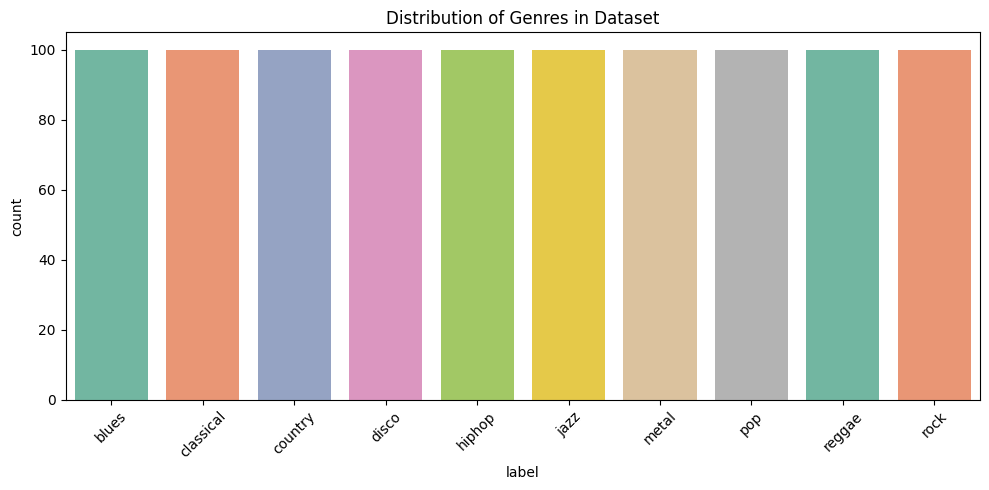

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title("Distribution of Genres in Dataset")
plt.tight_layout()
plt.show()


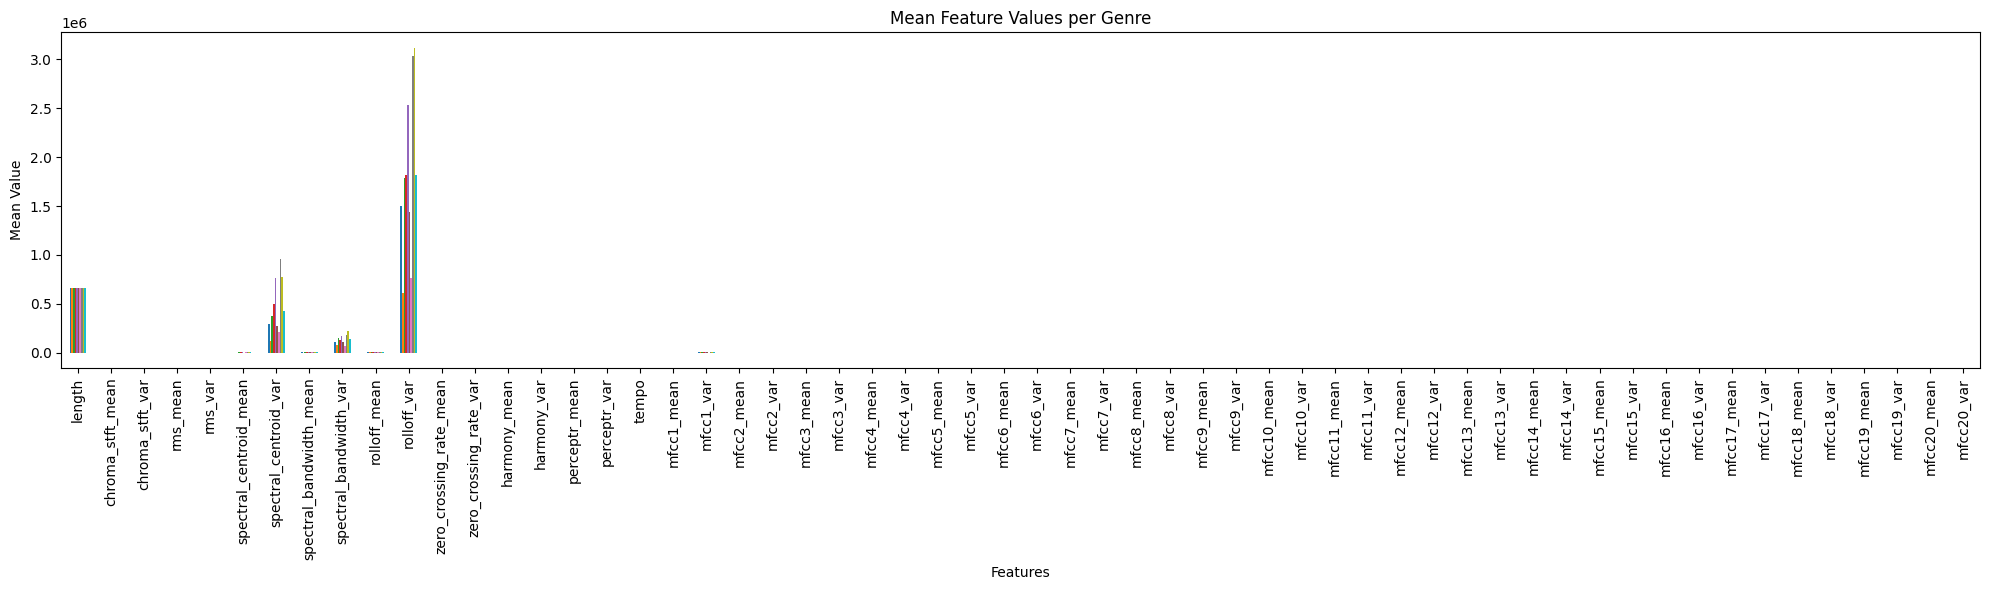

In [30]:
mean_features = df.groupby('label').mean(numeric_only=True)
mean_features.T.plot(kind='bar', figsize=(20, 6), legend=False)
plt.title("Mean Feature Values per Genre")
plt.ylabel("Mean Value")
plt.xlabel("Features")
plt.tight_layout()
plt.show()



C:\Users\yuvan\AppData\Local\Temp\ipykernel_24348\3201168928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='tempo', palette='muted')


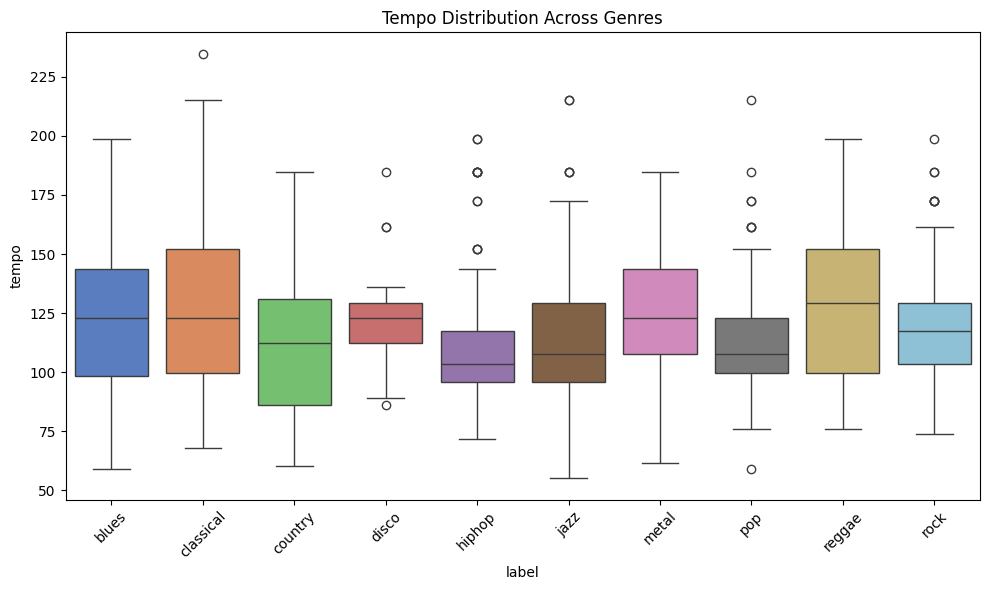

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='tempo', palette='muted')
plt.xticks(rotation=45)
plt.title("Tempo Distribution Across Genres")
plt.tight_layout()
plt.show()


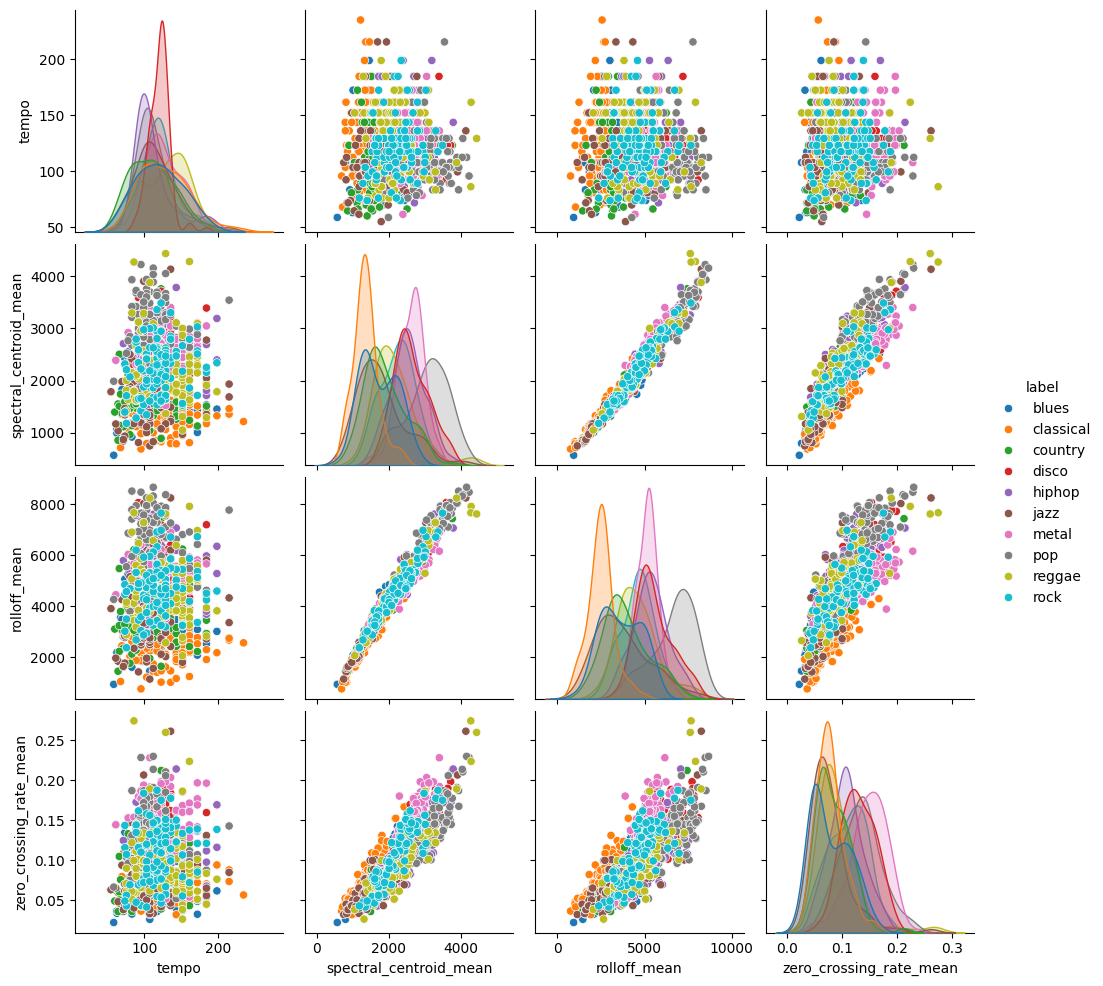

In [32]:
sns.pairplot(df[['tempo', 'spectral_centroid_mean', 'rolloff_mean', 'zero_crossing_rate_mean', 'label']], hue='label')
plt.show()
